<a href="https://colab.research.google.com/github/Omarnot2far/football_data_analysis/blob/main/Football_Metrics__Expected_Goals_(xG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplsoccer


In [ ]:
from mplsoccer import Sbopen
parser = Sbopen()

# The 2024 Copa América final Football match
We are going to analyse Football match id: **69301**

In [ ]:
df_event, df_related, df_freeze, df_tactics = parser.event(69301)
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3289 non-null   object 
 1   index                           3289 non-null   int64  
 2   period                          3289 non-null   int64  
 3   timestamp                       3289 non-null   object 
 4   minute                          3289 non-null   int64  
 5   second                          3289 non-null   int64  
 6   possession                      3289 non-null   int64  
 7   duration                        2457 non-null   float64
 8   match_id                        3289 non-null   int64  
 9   type_id                         3289 non-null   int64  
 10  type_name                       3289 non-null   object 
 11  possession_team_id              3289 non-null   int64  
 12  possession_team_name            32

To Understand about the Columns: https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Events%20v4.0.0.pdf

# 1. Expected Goals (xG)


Expected Goals, often denoted as ‘xG’, is a statistical measure of the quality of chances in a football match. expected goals (xG) is a performance metric used to evaluate team and player performances. It can be used to represent the probability of a scoring opportunity that may result in a goal. An xG value **above 0.38 for a specific shot is considered a big chance**.

The ‘**expected**’ part refers to the likelihood of a particular shot ending in a goal based on a multitude of factors, including **distance from the goal**, **angle of the shot**, and **type of assist**.

Introduced to bridge the gap between raw shot counts and the context of those shots, xG provides insights into a player’s finishing ability and a team’s potential scoring capacity.

High xG values for a team often indicate that they are creating good goal-scoring opportunities, regardless of whether they actually convert them into goals. On the other hand, analysing low xG numbers against could suggest defensive solidity or an underperforming attack. Notable in its use across media and team analysis, xG is revolutionising the way we understand and appreciate each touch of the ball.

In [ ]:
pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
from mplsoccer import Pitch, VerticalPitch, FontManager
from statsbombpy import sb
import seaborn as sns
from scipy import stats
import math

# Distance from Goal Analysis

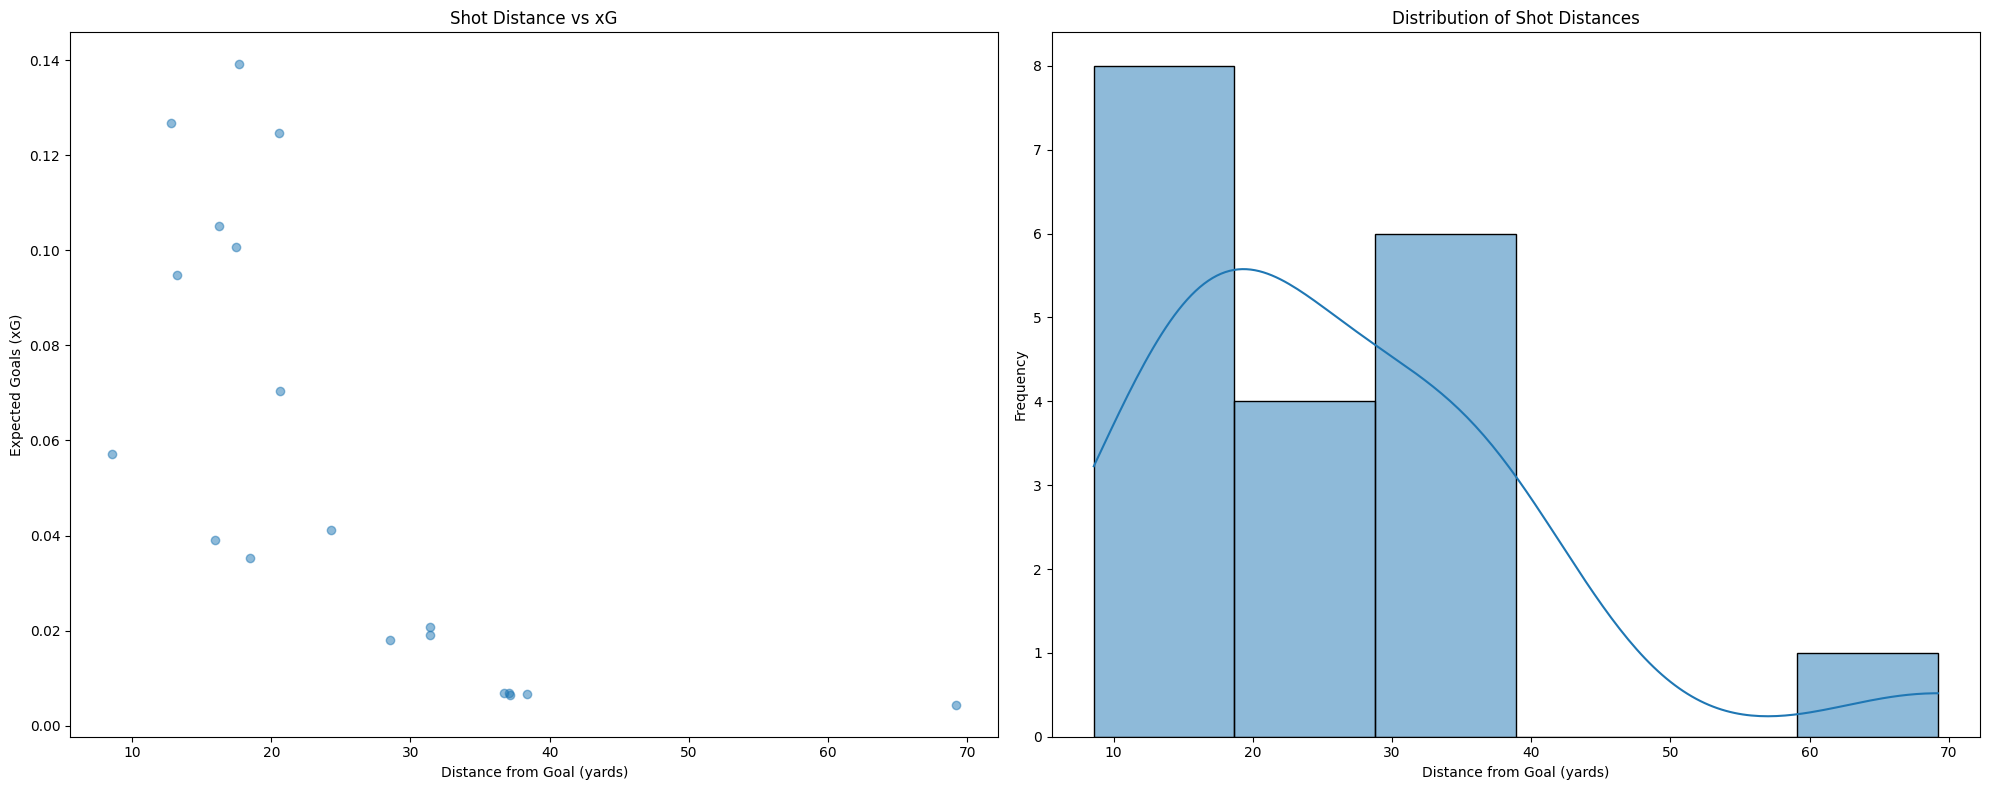

In [ ]:
# 1. Distance from Goal Analysis
def calculate_distance(x, y):
    """Calculate distance from goal (assuming goal is at x=120, y=40)"""
    return np.sqrt((120 - x)**2 + (40 - y)**2)

def distance_analysis(events):
    shots = events[events['type_name'] == 'Shot'].copy()
    shots['distance'] = shots.apply(lambda row: calculate_distance(row['x'], row['y']), axis=1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Distance vs xG scatter plot
    ax1.scatter(shots['distance'], shots['shot_statsbomb_xg'], alpha=0.5)
    ax1.set_xlabel('Distance from Goal (yards)')
    ax1.set_ylabel('Expected Goals (xG)')
    ax1.set_title('Shot Distance vs xG')

    # Distance distribution
    sns.histplot(shots['distance'], kde=True, ax=ax2)
    ax2.set_xlabel('Distance from Goal (yards)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of Shot Distances')

    plt.tight_layout()
    return fig, (ax1, ax2)

fig, (ax1, ax2) = distance_analysis(df_event)
plt.show()

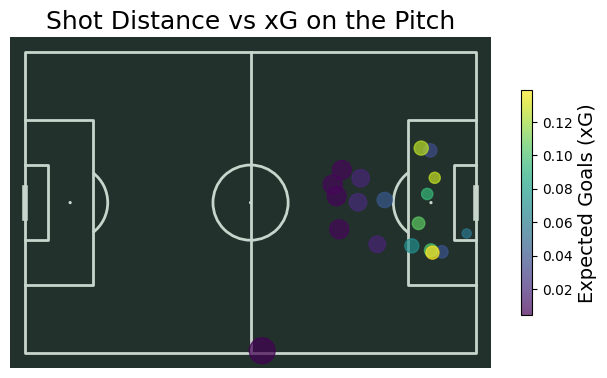

In [ ]:
from matplotlib import rcParams
# 1. Distance from Goal Analysis
def calculate_distance(x, y):
    """Calculate distance from goal (assuming goal is at x=120, y=40)"""
    return np.sqrt((120 - x)**2 + (40 - y)**2)

def distance_analysis(events):
    shots = events[events['type_name'] == 'Shot'].copy()
    shots['distance'] = shots.apply(lambda row: calculate_distance(row['x'], row['y']), axis=1)

    # Create a pitch object
    pitch = Pitch(pitch_type = 'statsbomb', pitch_color = '#22312b', line_color = '#c7d5cc')
    fig, ax = pitch.draw()

    # Scatter plot of distance vs xG on the pitch
    sc = ax.scatter(shots['x'], shots['y'], c=shots['shot_statsbomb_xg'], s=shots['distance'] * 5, cmap='viridis', alpha=0.7)

    # Add colorbar
    cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
    cbar.set_label('Expected Goals (xG)', fontsize=14)

    # Set title
    ax.set_title('Shot Distance vs xG on the Pitch', fontsize=18)

    return fig, ax

fig, ax = distance_analysis(df_event)
plt.show()


# ShotMap for Both Team

In [ ]:
df_event['team_name'].unique()

array(["England Women's", "Sweden Women's"], dtype=object)

In [ ]:
def generateTeamxGDataFrame(team_name):
    team_xg = df_event[df_event['team_name']==team_name].reset_index()
    return team_xg

In [ ]:
def generatexGPlot(team_name):
    team_xg = generateTeamxGDataFrame(team_name)
    shots = team_xg[team_xg['type_name'] == 'Shot']
    plt.figure(figsize=(12, 6))
    plt.clf()
    sns.lineplot(data=shots,x='minute',y='shot_statsbomb_xg',errorbar=None)
    plt.xlabel("Minutes")
    plt.ylabel("xG")
    plt.title("xG/Minute for "+ team_name)
    plt.show()

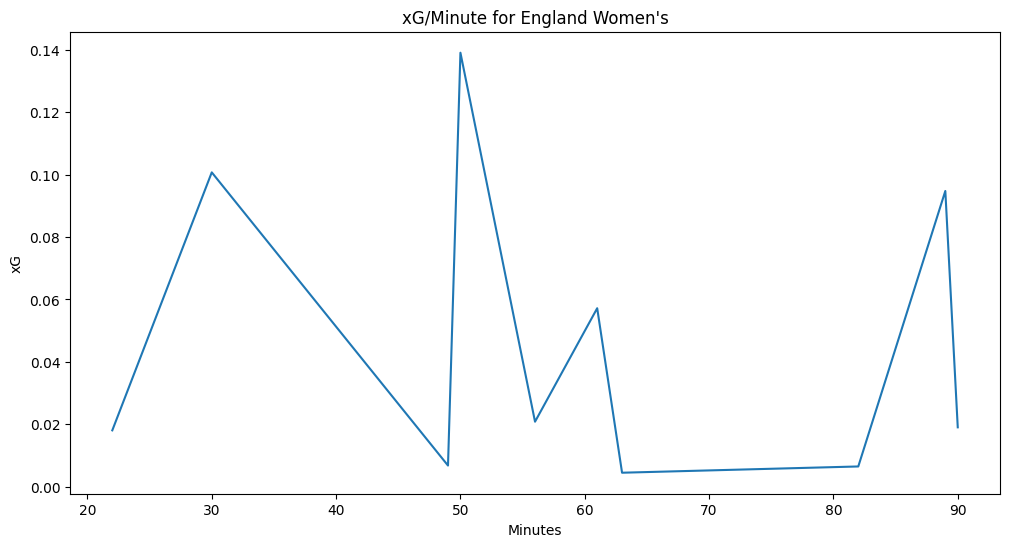

In [ ]:
generatexGPlot("England Women's")

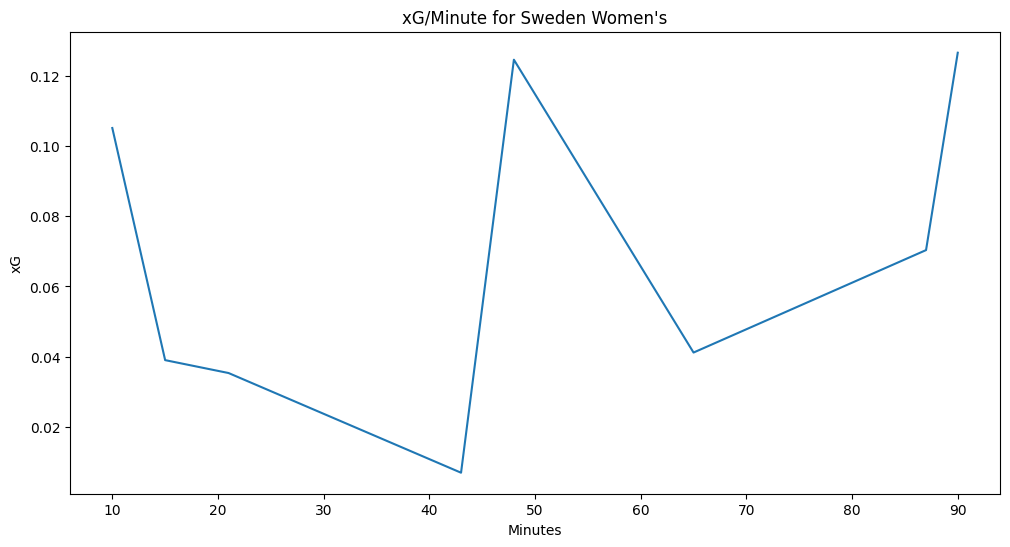

In [ ]:
generatexGPlot("Sweden Women's")

In [ ]:
def generateCombinedShotMap(team1,team2):
    team1_xg = generateTeamxGDataFrame(team1)
    team2_xg = generateTeamxGDataFrame(team2)
    team1_shots = team1_xg[team1_xg.type_name=='Shot']
    team2_shots = team2_xg[team2_xg.type_name=='Shot']
    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(team1_shots.x, team1_shots.y, alpha = 0.3, s = team1_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)
    pitch.scatter(120-team2_shots.x, 80-team2_shots.y, alpha = 0.3, s = team2_shots.shot_statsbomb_xg*5000, color = "blue", ax=ax['pitch'],)
    ax['pitch'].text(5, 5, team2 + ' shots',color='white',size=20)
    ax['pitch'].text(80, 5, team1 + ' shots',color='white',size=20)

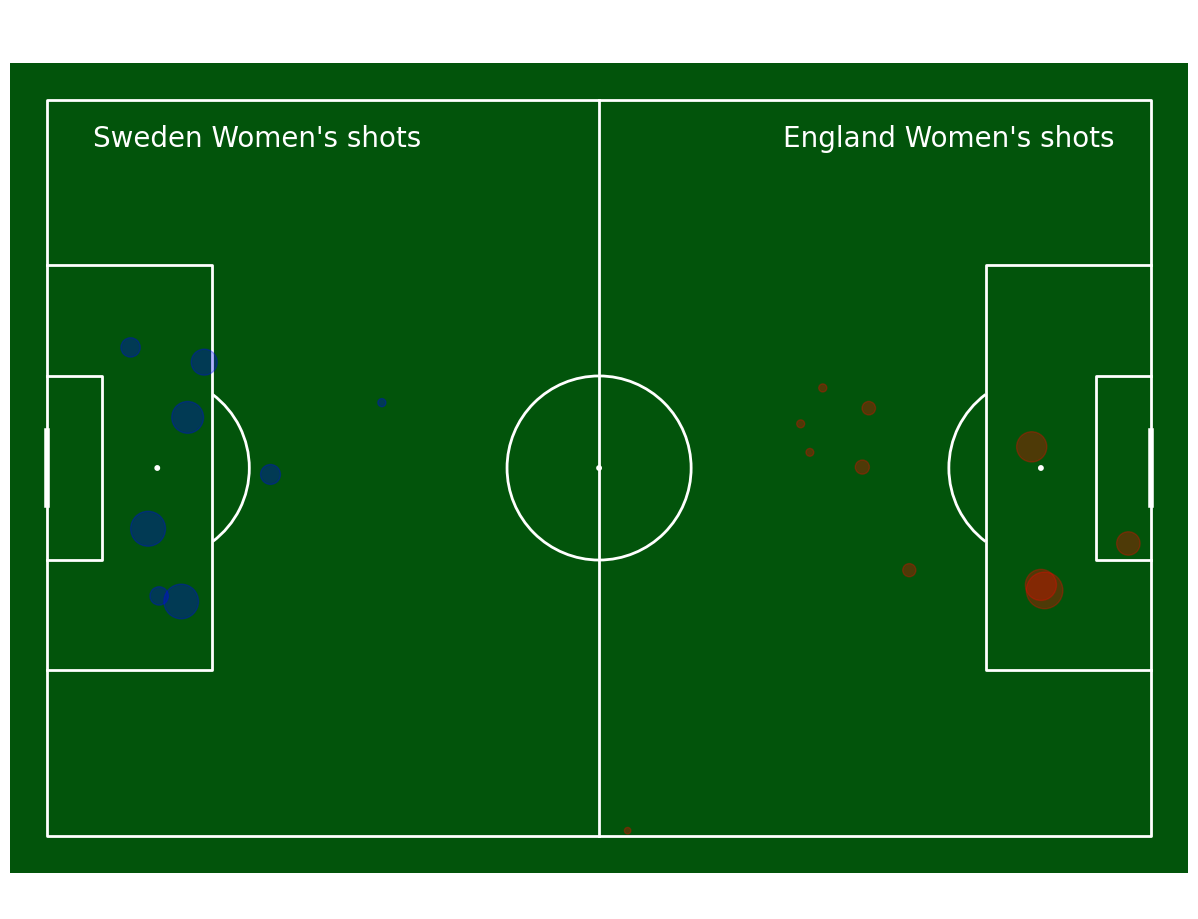

In [ ]:
generateCombinedShotMap("England Women's","Sweden Women's")